# Part II - (Ford GoBike Trip Distance per User Age and User Type)
## by (Anuoluwa Ayodele)

## Investigation Overview


> In this investigation, I wanted to take a look at how the distance of trips changes with respect to user age and customer type. The main focus was on member_gender, bike_share start_weekday and user_type.



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are 171,494 bike rides in the dataset with 12 features (start_station_id, start_station_name, end_station_id, end_station_name,	bike_id, user_type, member_gender, 	bike_share_for_all_trip, distance, start_weekday, duration_minutes and user_age) in the bike-sharing system covering the greater San Francisco Bay area after the Data Wrangling process. 

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike_share.csv')
bike.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171494 entries, 0 to 171493
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_station_id    171494 non-null  int64  
 1   start_station_name  171494 non-null  object 
 2   end_station_id      171494 non-null  int64  
 3   end_station_name    171494 non-null  object 
 4   bike_id             171494 non-null  int64  
 5   user_type           171494 non-null  object 
 6   member_gender       171494 non-null  object 
 7   bike_share          171494 non-null  object 
 8   distance            171494 non-null  float64
 9   start_weekday       171494 non-null  object 
 10  duration_minutes    171494 non-null  int64  
 11  user_age            171494 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 15.7+ MB


## (Distribution of Rides by User Type)

> 91% of the bike users were subscribers while 9% were casual users (customers), indicating that majority of the users were Subscribers


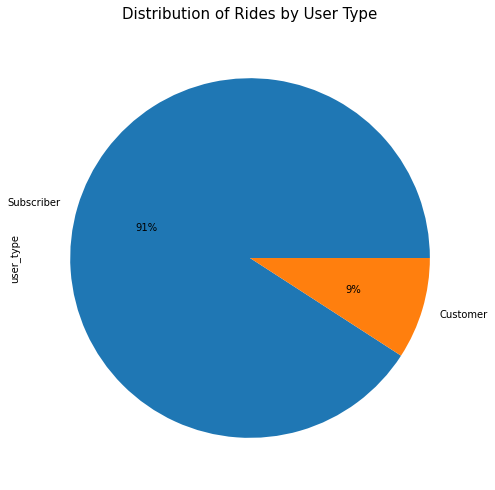

In [9]:
plt.figure(figsize=[14.70, 8.27])
users = bike['user_type'].value_counts()
users.plot(
    kind='pie',  autopct='%1.0f%%')
plt.title("Distribution of Rides by User Type",{'fontsize': 15},pad=15);

## (Distribution of Rides by User Type and Bike Shared)

> A very tiny percentage of subscriber riders have utilized bike share for their whole trip, compared to all of the customer riders, who have not used it at all for the entirety of their journey. 

In [10]:
# load in the sample dataset into a pandas dataframe
sample = pd.read_csv('sample.csv')
key_numeric_vars = ['duration_minutes','user_age','distance']

# start_weekday into ordered categorical types
ordinal_var_dict = {'start_weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    sample[var] = sample[var].astype(ordered_var);

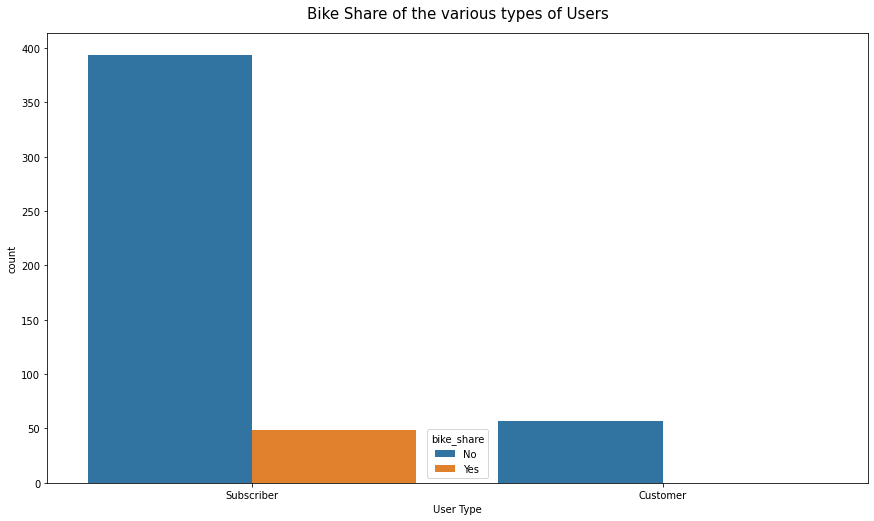

In [11]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data = sample, x = 'user_type', hue = 'bike_share')
plt.xlabel('User Type')
plt.title('Bike Share of the various types of Users',{'fontsize': 15},pad=15);

## (Distribution of Rides by User Type and Gender)

> Male riders make up the majority of "subscribers" and "customers" user type.

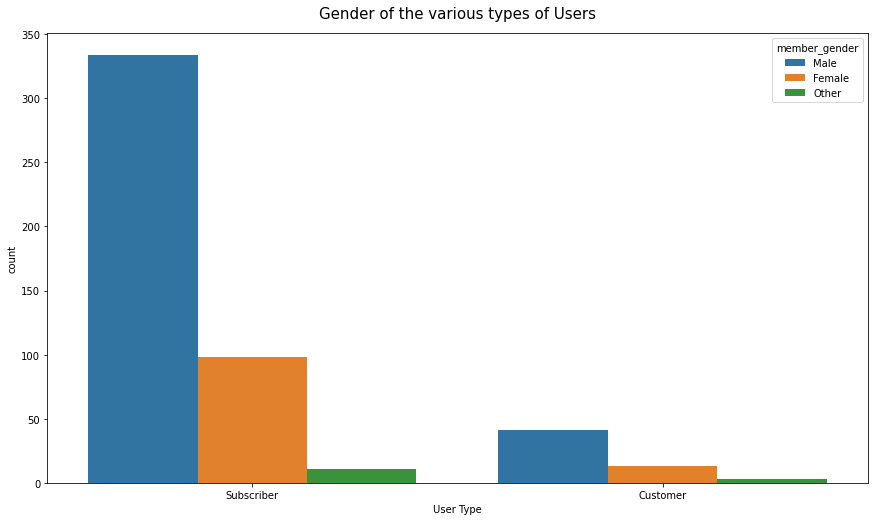

In [12]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data = sample, x = 'user_type', hue = 'member_gender')
plt.xlabel('User Type')
plt.title('Gender of the various types of Users',{'fontsize': 15},pad=15);

## (Daily Bike Usage per User Type)

> Overall, Subscribers have higher number of trips than customers across all days of the week. On average, Weekends has highest numbers of customer users.

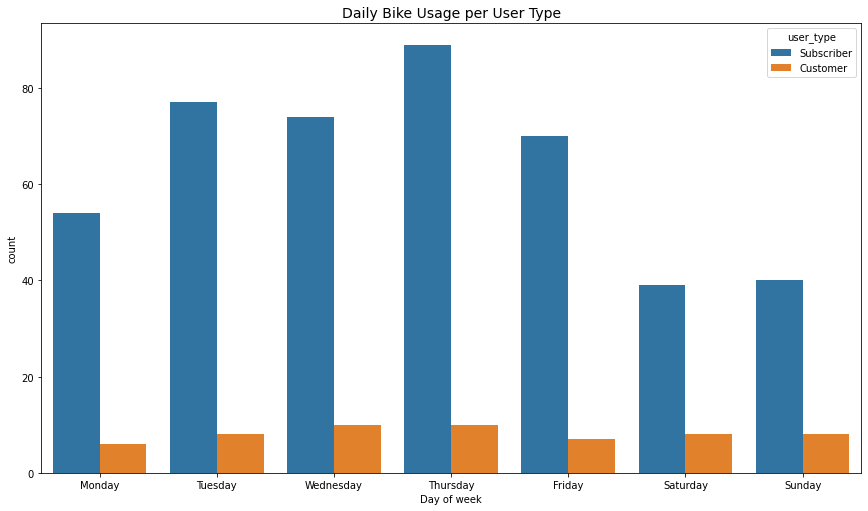

In [13]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data = sample, x = 'start_weekday', hue = 'user_type')
plt.xlabel('Day of week')
plt.title('Daily Bike Usage per User Type', fontsize=14);

## (User Age across user type and Bike Share for Trips)

- In Subscribers, there are few older people from age 34 and above compared to several older people from age 31 to 36 in Customers. 
- Generally older people do not share bikes both in subscribers and customers.
- Customers do not share bikes for their rides as they use it occassionally.

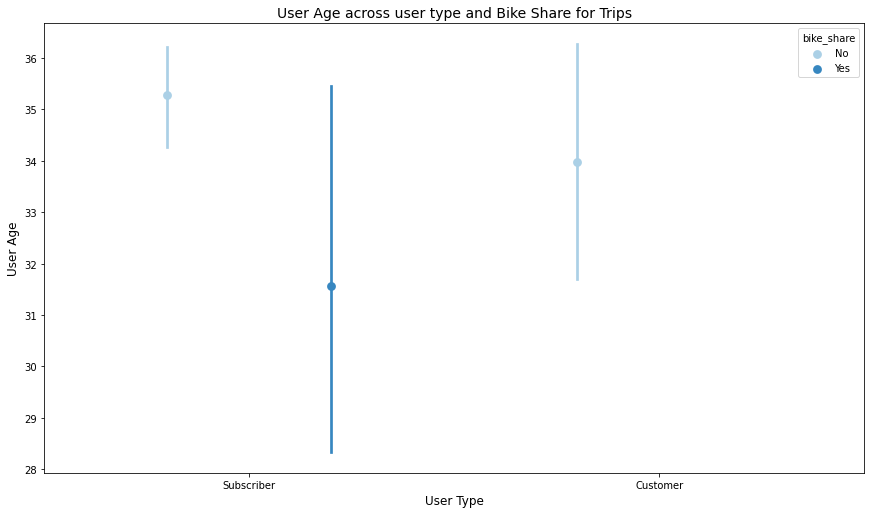

In [14]:
plt.figure(figsize=[14.70, 8.27])
ax = sb.pointplot(data = sample, x ='user_type', y = 'user_age', hue = 'bike_share',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('User Age across user type and Bike Share for Trips', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('User Age', fontsize=12);

## (User Age across user type and Bike Share for Trips)

- In Subscribers, the distance covered by riders are generally short but mostly shared between riders
- Generally riders do not share bikes both in subscribers and customers when covering longer distances
- Customers do not share bikes for their rides as they cover longer distances.

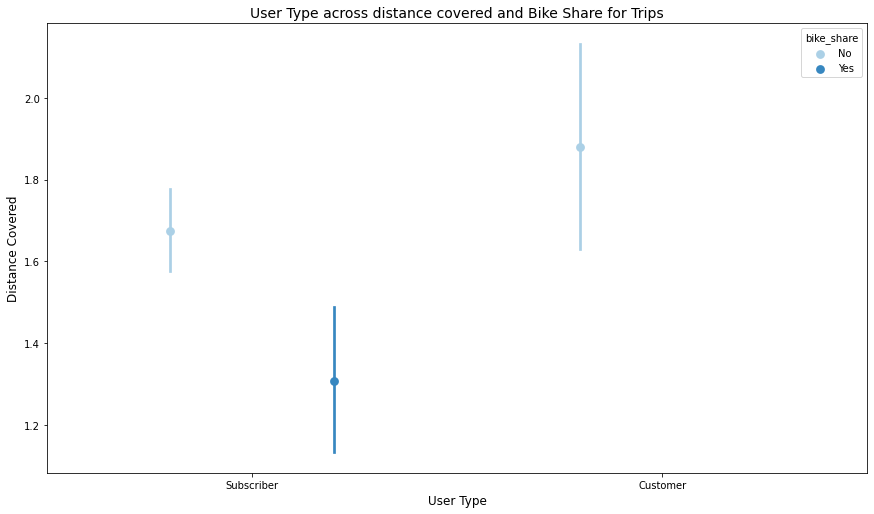

In [15]:
plt.figure(figsize=[14.70, 8.27])
ab = sb.pointplot(data = sample, x ='user_type', y = 'distance', hue = 'bike_share',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('User Type across distance covered and Bike Share for Trips', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Distance Covered', fontsize=12);

## (User Age across user type and Bike Share for Trips)

- In Subscribers, the duration spent in minutes per trip are generally small when compared to customers.
- Generally riders who used more durations in minutes do not share bikes both in subscribers and customers
- Customers do not share bikes for their rides as they spend more time in minutes covering their trips

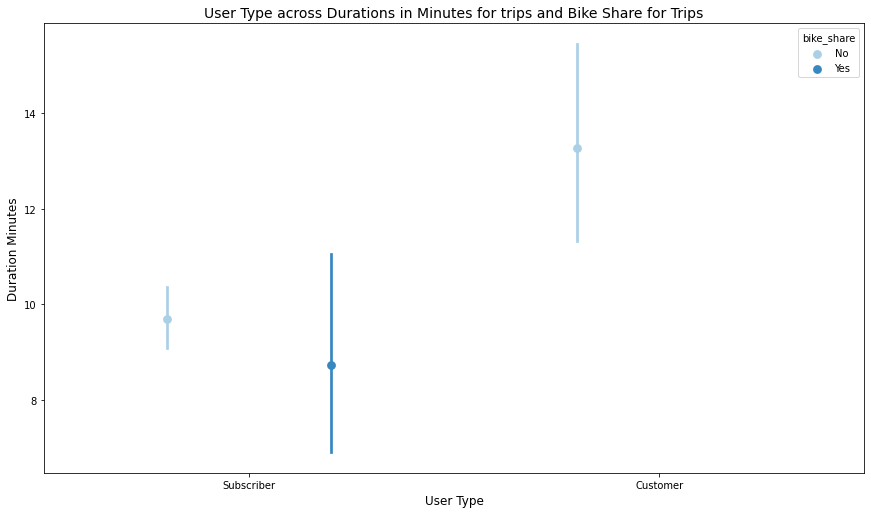

In [16]:
plt.figure(figsize=[14.70, 8.27])
ab = sb.pointplot(data = sample, x ='user_type', y = 'duration_minutes', hue = 'bike_share',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('User Type across Durations in Minutes for trips and Bike Share for Trips', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration Minutes', fontsize=12);

## (Conclusion)

> The exploratory analysis shows that 91% of the users were subscribers while 9% were casual users (customers). Customer user type are generally older users when compared with Subscribers. Customer users usually use the bike rides to travel far distances which makes them to spend longer duration in minutes to cover their rides. It is also interesting that despite the age and distance covered by customers, they do not share their rides with other people in all their bike trips. 

>On the contrary, subscribers are middle aged users (between 20 - 40years) who travelled short distances within averagely short durations in minutes and majorily sharing their bikes. Overall, Subscribers have higher number of trips than customers across all days of the week. Moreover, Thursday has the most ‘Subscriber’ and ‘Customer’ bikers compared to other days. 

In [ ]:
!jupyter nbconvert Part_II_exploratory_analysis_Gobike_Service_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_exploratory_analysis_Gobike_Service_slide_deck.ipynb to slides
[NbConvertApp] Writing 714674 bytes to Part_II_exploratory_analysis_Gobike_Service_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_exploratory_analysis_Gobike_Service_slide_deck.slides.html
Use Control-C to stop this server


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 